# Exploración y Análisis de Datos (EDA)

[![Banner.png](https://i.postimg.cc/C1t2SCwf/Banner.png)](https://postimg.cc/FdypxLd9)

## Introducción

Este notebook se centra en el análisis exploratorio de datos (EDA) para comprender mejor las características de las transacciones financieras y detectar patrones relacionados con el fraude. Las tareas principales incluyen:

**Exploración descriptiva:** Examinar las características de los datos, como la distribución de variables, relaciones entre variables y valores atípicos.

**Visualización de datos:** Crear gráficos y tablas para visualizar la distribución de los datos, identificar patrones y tendencias, y destacar posibles indicadores de fraude.

**Análisis de correlación:** Evaluaremos la relación entre variables para comprender cómo se asocian los diferentes factores con el fraude.

**Identificación de características relevantes:** Seleccionar las variables más importantes para el análisis posterior, como el monto de la transacción, el método de pago y la ubicación del cliente.
Objetivos:

Obtener una comprensión profunda de las características de las transacciones financieras.
Identificar patrones y tendencias que puedan indicar actividades fraudulentas.
Seleccionar las variables más relevantes para la construcción de modelos de predicción de fraude.


In [ ]:
# Instalo bibliotecas
%pip install prophet
%pip install --upgrade jupyter ipywidgets
%pip install tqdm fbprophet
%pip install plotly
%pip install pandas requests
%pip install tabulate
%pip install geopy
%pip install wordcloud

Para este análisis y proyección de fraudes, estamos utilizando las bibliotecas esenciales pandas, numpy, sklearn, matplotlib y seaborn para manipular, analizar y visualizar los datos. 

Además, empleamos tqdm para mostrar el progreso de las tareas, fbprophet para realizar proyecciones de series temporales, plotly y tabulate para visualizar y presentar los resultados de manera efectiva, y requests para obtener datos de fuentes externas si es necesario. 

Finalmente, geopy y wordcloud están disponibles para trabajar con datos de ubicación y texto, respectivamente, si estos tipos de datos estuvieran presentes en nuestro conjunto de datos.

In [1]:
# Importo librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import random
import time
import pandas as pd
import requests
import time
import json
import matplotlib.pyplot as plt
import tqdm
import os

from time import sleep
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from prophet import Prophet


In [2]:
# Cargo el DataFrame guardado para leerlo
file_path = r"C:\Users\Esteban García\OneDrive\Escritorio\LABs\Carpeta Fraude\DF guardado\ecommerce.csv"
ecommerce = pd.read_csv(file_path)

In [3]:
"""visualizo el df para tener un primer acercamiento"""
ecommerce

,Transaction ID,Customer ID,Transaction Amount,Transaction Day,Transaction Hour,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,20-02-2024,05:58:41,Bank Transfer,Electronics,1,17,Amandaborough,Tablet,212.195.49.198,Unit 8934 Box 0058\nDpo Aa 05437,Unit 8934 Box 0058\nDpo Aa 05437,0,30
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,25-02-2024,08:09:45,Debit Card,Electronics,2,40,East Timothy,Desktop,208.106.249.121,"634 May Keys\nPort Cherylview, Nv 75063","634 May Keys\nPort Cherylview, Nv 75063",0,72
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,18-03-2024,03:42:55,Paypal,Home & Garden,2,22,Davismouth,Tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, Il 15564","16282 Dana Falls Suite 790\nRothhaven, Il 15564",0,63
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,16-03-2024,20:41:31,Bank Transfer,Clothing,5,31,Lynnberg,Desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, Ut 84798","828 Strong Loaf Apt. 646\nNew Joshua, Ut 84798",0,124
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,15-01-2024,05:08:17,Bank Transfer,Clothing,2,51,South Nicole,Tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472689,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,12-01-2024,23:39:55,Paypal,Health & Beauty,2,29,North Laurafort,Desktop,27.245.104.92,Usnv Griffin\nFpo Aa 52700,Usnv Griffin\nFpo Aa 52700,0,149
1472690,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,27-03-2024,04:31:45,Credit Card,Clothing,2,32,Burnsville,Tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, Ga 68797","478 John Square Apt. 235\nMillerhaven, Ga 68797",0,132
1472691,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,31-01-2024,23:51:42,Bank Transfer,Electronics,4,36,Garciafort,Mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, Oh ...","182 House Island Suite 198\nEast Scott, Fm 84301",0,98
1472692,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,12-01-2024,16:21:32,Bank Transfer,Electronics,5,34,Lake Josephberg,Desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, Wv ...","27307 Gonzalez Shore Suite 661\nPort Lynn, Wv ...",0,191


### Comienzo con el análisis exploratorio EDA

In [4]:
"""pretendo visualizar todas las columnas"""
print(ecommerce.columns)

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Day', 'Transaction Hour', 'Payment Method',
       'Product Category', 'Quantity', 'Customer Age', 'Customer Location',
       'Device Used', 'IP Address', 'Shipping Address', 'Billing Address',
       'Is Fraudulent', 'Account Age Days'],
      dtype='object')


In [5]:
"""busco ver la dimensión del df"""
print(len(ecommerce))

1472694


In [6]:
"""verifico el tipo de dato"""
print(ecommerce.dtypes)


Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Day        object
Transaction Hour       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
dtype: object


Al revisar los datos, observamos que contienen información diversa sobre las transacciones de comercio electrónico, incluyendo identificadores, montos, fechas, métodos de pago y características de los clientes. 

Es importante destacar que la fecha de la transacción deberá ser ajustada para facilitar su análisis en el futuro.

In [7]:
"""en esta etapa trato de ver en detalle el contenido sin profundizar"""
print(ecommerce.head())


                         Transaction ID                           Customer ID  \
0  15d2e414-8735-46fc-9e02-80b472b2580f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  0bfee1a0-6d5e-40da-a446-d04e73b1b177  37de64d5-e901-4a56-9ea0-af0c24c069cf   
2  e588eef4-b754-468e-9d90-d0e0abfc1af0  1bac88d6-4b22-409a-a06b-425119c57225   
3  4de46e52-60c3-49d9-be39-636681009789  2357c76e-9253-4ceb-b44e-ef4b71cb7d4d   
4  074a76de-fe2d-443e-a00c-f044cdb68e21  45071bc5-9588-43ea-8093-023caec8ea1c   

   Transaction Amount Transaction Day Transaction Hour Payment Method  \
0               58.09      20-02-2024         05:58:41  Bank Transfer   
1              389.96      25-02-2024         08:09:45     Debit Card   
2              134.19      18-03-2024         03:42:55         Paypal   
3              226.17      16-03-2024         20:41:31  Bank Transfer   
4              121.53      15-01-2024         05:08:17  Bank Transfer   

  Product Category  Quantity  Customer Age Customer Location Device Used  

En esta explicación, solo visualizo las primeras cinco transacciones del conjunto de datos revelan información sobre identificadores únicos de transacción y cliente, montos de compra variados, fechas a lo largo de los primeros meses de 2024, métodos de pago diversos (transferencia bancaria, tarjeta de débito, PayPal), categorías de productos (electrónica, hogar y jardín, ropa), cantidades compradas, edades de clientes (entre 17 y 51 años), ubicaciones (ciudades ficticias), dispositivos utilizados (tableta, escritorio), direcciones IP, direcciones de envío y facturación, así como un indicador de si la transacción fue fraudulenta o no (en este caso, todas las mostradas son legítimas). Además, se incluye la antigüedad de la cuenta en días.

In [8]:
"""visualizo en este primer asercamiento un resumen estadístico"""
print(ecommerce.describe())


       Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        1.472694e+06  1.472694e+06  1.472694e+06   1.472694e+06   
mean         2.267695e+02  3.000225e+00  3.451868e+01   5.012990e-02   
std          2.704015e+02  1.414733e+00  9.991539e+00   2.182130e-01   
min          1.000000e+01  1.000000e+00  0.000000e+00   0.000000e+00   
25%          6.861000e+01  2.000000e+00  2.800000e+01   0.000000e+00   
50%          1.517600e+02  3.000000e+00  3.500000e+01   0.000000e+00   
75%          2.960500e+02  4.000000e+00  4.100000e+01   0.000000e+00   
max          1.270175e+04  5.000000e+00  8.600000e+01   1.000000e+00   

       Account Age Days  
count      1.472694e+06  
mean       1.796454e+02  
std        1.068642e+02  
min        1.000000e+00  
25%        8.600000e+01  
50%        1.790000e+02  
75%        2.720000e+02  
max        3.650000e+02  


Trabajamos para obtener promedios.

Cada transacción tiene un valor de $226.77, se compran 3 unidades por transacción, y los clientes tienen una edad media de 34.5 años. 

El monto mínimo de transacción es de $10, mientras que el máximo alcanza los $12,701.75, lo que sugiere una amplia variabilidad en los valores de compra. Además, el 5% de las transacciones son fraudulentas. La antigüedad de las cuentas varía desde 1 día hasta 365 días, con una media de 179.6 días. 

Esta información nos da una idea inicial de la distribución y características principales de los datos, y puede ser útil para identificar valores atípicos y establecer puntos de referencia para análisis posteriores.

In [9]:
"""analizo el periodo del df"""
ecommerce['Transaction Day'] = pd.to_datetime(ecommerce['Transaction Day'], format='%d-%m-%Y')

# Obtengo la fecha inicial y final
fecha_inicial = ecommerce['Transaction Day'].min()
fecha_final = ecommerce['Transaction Day'].max()

print(f"Fecha inicial: {fecha_inicial}")
print(f"Fecha final: {fecha_final}")


Fecha inicial: 2024-01-01 00:00:00
Fecha final: 2024-04-03 00:00:00


,Transaction Amount,Transaction Day,Quantity,Customer Age,Is Fraudulent,Account Age Days
count,1.472694e+06,1472694,1.472694e+06,1.472694e+06,1.472694e+06,1.472694e+06
mean,2.267695e+02,2024-02-16 04:08:16.565885952,3.000225e+00,3.451868e+01,5.012990e-02,1.796454e+02
min,1.000000e+01,2024-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.861000e+01,2024-01-24 00:00:00,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01
50%,1.517600e+02,2024-02-16 00:00:00,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02
75%,2.960500e+02,2024-03-10 00:00:00,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02
max,1.270175e+04,2024-04-03 00:00:00,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02
std,2.704015e+02,NaN,1.414733e+00,9.991539e+00,2.182130e-01,1.068642e+02


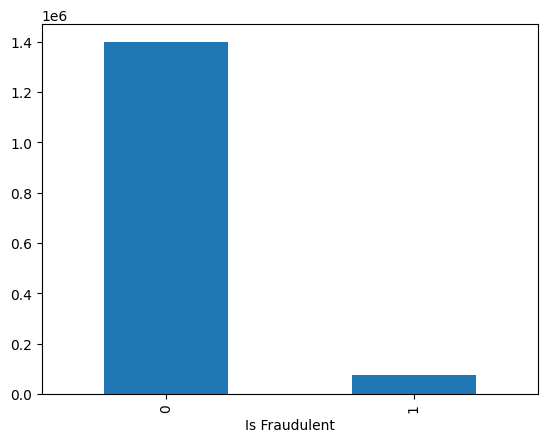

In [10]:
# Distribución de la variable objetivo
ecommerce['Is Fraudulent'].value_counts().plot(kind='bar')

# Descripción estadística de las variables numéricas
ecommerce.describe()


Al observar los estadísticos de las transacciones, notamos que los montos varían considerablemente, desde compras pequeñas hasta algunas de gran valor. En promedio, los clientes compran 3 artículos por transacción y tienen alrededor de 34 años. 

Es importante destacar que solo un pequeño porcentaje de las transacciones son fraudulentas, lo cual es un desafío para su detección. 

Respecto a la antigüedad de las cuentas de los clientes también muestra una amplia variación, desde cuentas nuevas hasta algunas con un año de antigüedad.

Explicando el gráfico, se observa que la gran mayoría de las transacciones son legítimas (valor 0), mientras que las transacciones fraudulentas (valor 1) representan una proporción muy pequeña. Esto indica un desequilibrio de clases significativo en el conjunto de datos, lo cual es un desafío común en la detección de fraude.

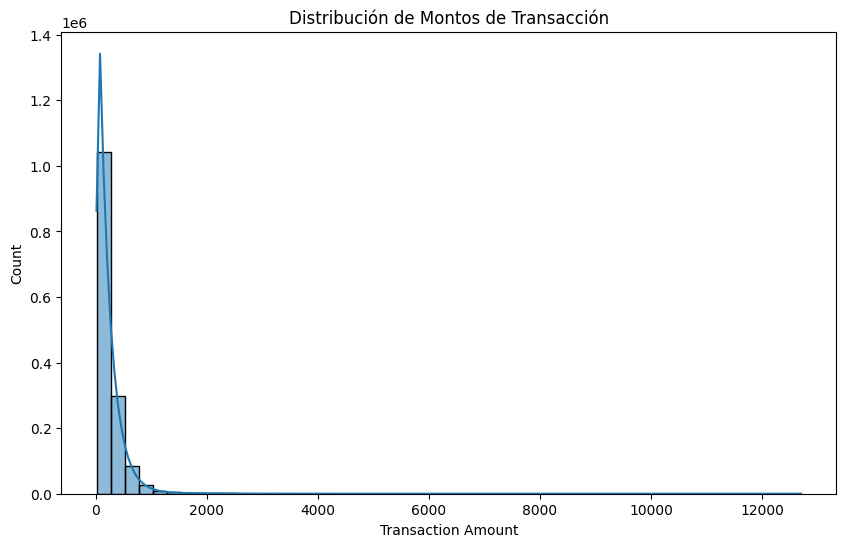

In [11]:
# Distribución de datos
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce['Transaction Amount'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacción')
plt.show()


El gráfico muestra que la mayoría de las transacciones tienen montos bajos, concentrados principalmente por debajo de los $2,000. 

Sin embargo, hay algunas transacciones atípicas con montos mucho más altos, lo que indica una distribución asimétrica a la derecha. Esto significa que, aunque la mayoría de los clientes realizan compras pequeñas, existen algunos que gastan cantidades significativamente mayores.

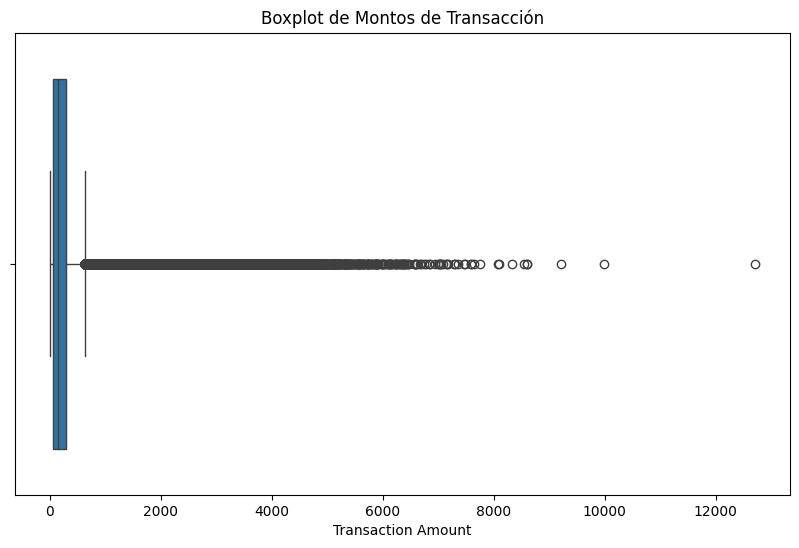

In [12]:
# Detección de valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=ecommerce['Transaction Amount'])
plt.title('Boxplot de Montos de Transacción')
plt.show()

Considerando nuestro análisis anterior, pretendemos visualizar los outliers para entender un poco mejor el comportamiento.

Existen algunas compras que se destacan por ser inusualmente elevadas, lo que podría indicar comportamientos atípicos o potencialmente fraudulentos que requieren una investigación más profunda.

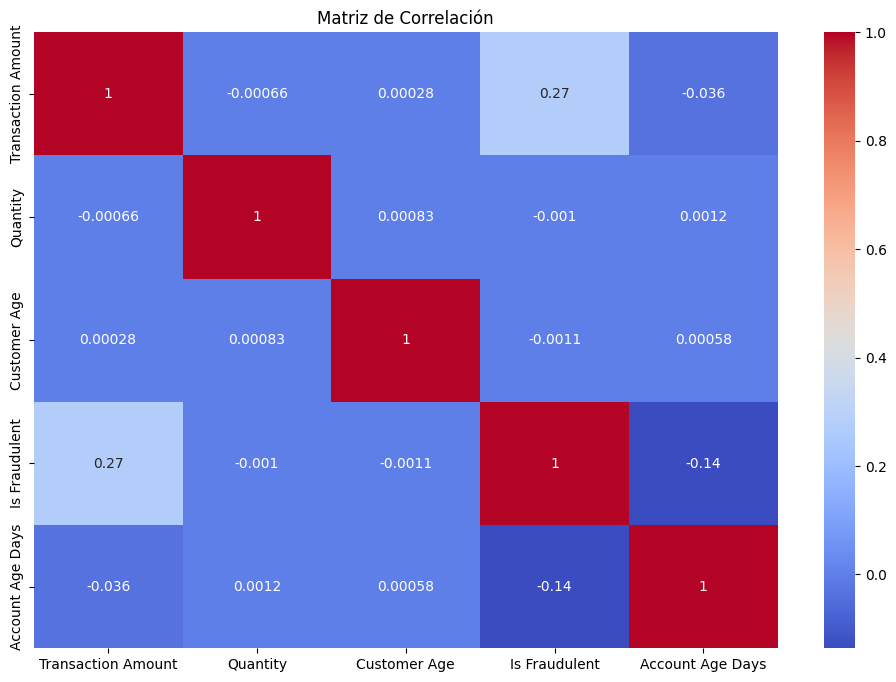

In [13]:
"""Correlación entre variables"""

# Selecciono solo las columnas numéricas
numeric_df = ecommerce.select_dtypes(include=['number'])

# Calculo la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizo la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


El mapa de calor nos muestra la relación entre diferentes aspectos numéricos de las transacciones. 

Vemos que el monto de la transacción tiene una ligera tendencia a ser más alto en casos de fraude, mientras que las cuentas más antiguas parecen estar asociadas con un menor riesgo de fraude. Sin embargo, es importante notar que estas relaciones no son muy fuertes, lo que sugiere que otros factores podrían estar influyendo en la probabilidad de fraude.

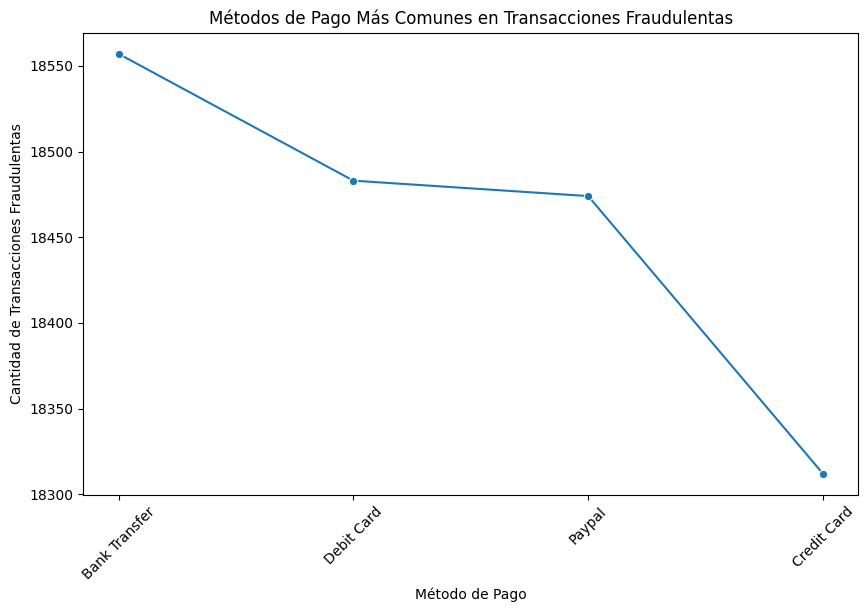

In [14]:
"""identifico los métodos de pago que están más asociados con las transacciones fraudulentas"""

# Filtro las transacciones fraudulentas
fraudulent_transactions = ecommerce[ecommerce['Is Fraudulent'] == 1]

# Cuento la frecuencia de cada método de pago en transacciones fraudulentas
payment_method_counts = fraudulent_transactions['Payment Method'].value_counts()

"""vamos a graficar la información con un gráfico de líneas
ya que la visualización es más amena y puede mostrar tendencias y variaciones"""

# Creo un gráfico de línea con marcadores
plt.figure(figsize=(10, 6))
sns.lineplot(x=payment_method_counts.index, y=payment_method_counts.values, marker='o')
plt.title('Métodos de Pago Más Comunes en Transacciones Fraudulentas')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones Fraudulentas')
plt.xticks(rotation=45)
plt.show()

Con la explicación del gráfico muestro la frecuencia de cada método de pago utilizado en transacciones fraudulentas. 

Aunque las transferencias bancarias son el método más común en términos absolutos, esto podría deberse a que los estafadores intentan aprovechar la percepción de que las transferencias bancarias son más seguras o difíciles de revertir, engañando a los compradores para que realicen pagos a cuentas fraudulentas. 

Para determinar qué método de pago está realmente más asociado con el fraude, es necesario analizar la proporción de transacciones fraudulentas dentro de cada método, ya que un método de pago puede ser utilizado con mayor frecuencia en general, tanto para transacciones legítimas como fraudulentas.

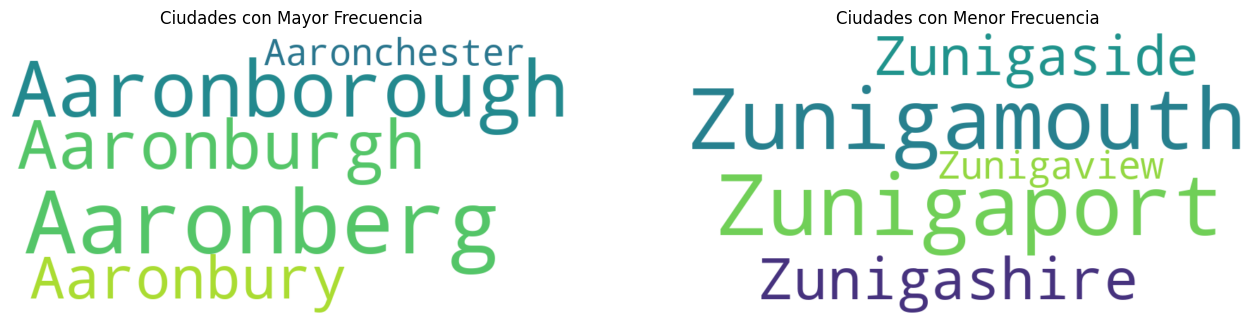

In [15]:
"""visualizaremos con una nube de palabras
las ciudades con más fraudes y a la derecha 
del mismo las ciudades con menor cantidad de fraudes"""

# Obtener las 5 ciudades más y menos frecuentes, con al menos 5 apariciones
all_transactions = ecommerce.copy()  # Creamos una copia para no modificar el original
all_transactions['count'] = 1  # Añadimos una columna con valor 1 para conteo

# Contamos las apariciones por ciudad
city_counts = all_transactions.groupby('Customer Location')['count'].sum()

# Filtro para mostrar solo ciudades con más de 5 apariciones
top_cities = city_counts[city_counts > 5].head(5)
bottom_cities = city_counts[city_counts > 5].tail(5)  # Ocupa las últimas 5 del total filtrado

# Convierto las Series en strings para crear las nubes de palabras
fraud_text = ' '.join(top_cities.index)
non_fraud_text = ' '.join(bottom_cities.index)  # Usamos bottom_cities para las menos frecuentes

# Creo las nubes de palabras
wordcloud_fraud = WordCloud(width=800, height=400, background_color='white').generate(fraud_text)
wordcloud_non_fraud = WordCloud(width=800, height=400, background_color='white').generate(non_fraud_text)

# Visualizo las nubes de palabras
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fraud, interpolation='bilinear')
plt.axis("off")
plt.title("Ciudades con Mayor Frecuencia")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_fraud, interpolation='bilinear')
plt.axis("off")
plt.title("Ciudades con Menor Frecuencia")

plt.show()

Las nubes de palabras revelan un patrón interesante en la distribución geográfica de los fraudes. Las ciudades con nombres que empiezan por "Aaron" aparecen con mayor frecuencia en transacciones fraudulentas, mientras que las ciudades con nombres que comienzan por "Zuniga" son menos frecuentes. 

Esto sugiere una posible concentración geográfica de actividades fraudulentas en ciertas áreas, lo cual podría ser útil para enfocar esfuerzos de prevención y detección en esas regiones específicas.

Igual cabe mencionar que dichas ciudades no existen y en este df las ciudades "Aaron" y "Zuniga" son ficticias y fueron generadas aleatoriamente en el conjunto de datos.

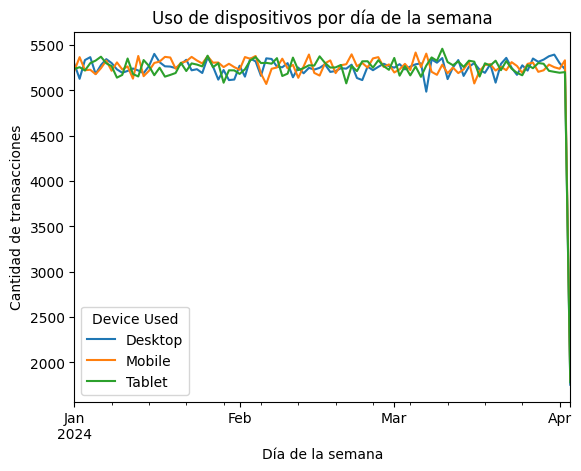

In [16]:
"""verificamos los medios más usados para las estafas"""
# Agrupando por día de la semana y dispositivo
dispositivos_por_dia = ecommerce.groupby(['Transaction Day', 'Device Used']).size().unstack()

# Visualizando las tendencias en un gráfico de líneas
dispositivos_por_dia.plot(kind='line')
plt.title('Uso de dispositivos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de transacciones')
plt.show()


El gráfico muestra que el uso de dispositivos (computadoras de escritorio, móviles y tabletas) para realizar transacciones se mantiene relativamente estable a lo largo de los meses, sin grandes variaciones entre los días de la semana. 

Esto sugiere que los clientes utilizan los tres tipos de dispositivos de manera consistente para realizar sus compras online.

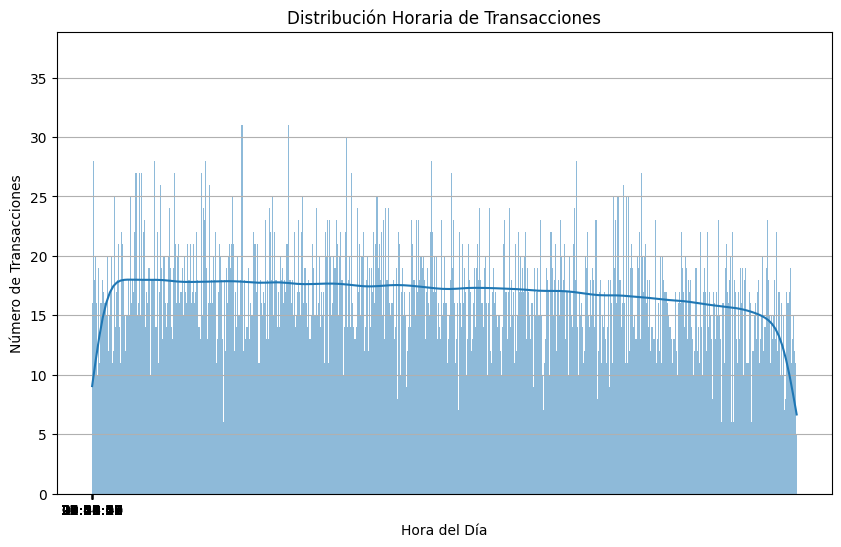

In [17]:
# Visualizo la distribución horaria
plt.figure(figsize=(10, 6))
sns.histplot(x='Transaction Hour', data=ecommerce, bins=24, kde=True) 
plt.title('Distribución Horaria de Transacciones')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Transacciones')
plt.xticks(range(24))  # Muestro todas las horas en el eje x
plt.grid(axis='y')  # Agrego una cuadrícula horizontal para facilitar la lectura
plt.show()


El gráfico muestra que la actividad de transacciones se concentra principalmente durante el día, con un pico en las primeras horas de la mañana y una disminución gradual hacia la noche. 

Aunque hay transacciones a lo largo de todas las horas, se observa una menor actividad durante la madrugada.

In [18]:
# Filtro transacciones fraudulentas
transacciones_fraudulentas = ecommerce[ecommerce['Is Fraudulent'] == 1]

# Calculo el número de transacciones fraudulentas por hora
transacciones_fraudulentas_por_hora = transacciones_fraudulentas['Transaction Hour'].value_counts()

# Obtengo el Top Ten de horas pico de transacciones fraudulentas
horas_pico_fraude = transacciones_fraudulentas_por_hora.head(10)

# Muestro las horas pico de transacciones fraudulentas en una tabla
print("Horas pico de transacciones fraudulentas:")
print(horas_pico_fraude.to_markdown(numalign="left", stralign="left"))


Horas pico de transacciones fraudulentas:
| Transaction Hour   | count   |
|:-------------------|:--------|
| 22:22:24           | 7       |
| 22:18:43           | 6       |
| 15:36:37           | 6       |
| 05:46:37           | 6       |
| 16:37:41           | 6       |
| 22:10:52           | 6       |
| 00:30:39           | 6       |
| 05:29:16           | 6       |
| 04:27:54           | 6       |
| 11:01:45           | 6       |


Un análisis detallado de las transacciones fraudulentas revela que la hora 22:22 es la más común para este tipo de actividad, seguida de cerca por otras horas de la tarde y noche. 

Este hallazgo sugiere que prestar especial atención a las transacciones realizadas en estos horarios podría ayudar a prevenir y detectar fraudes de manera más efectiva.

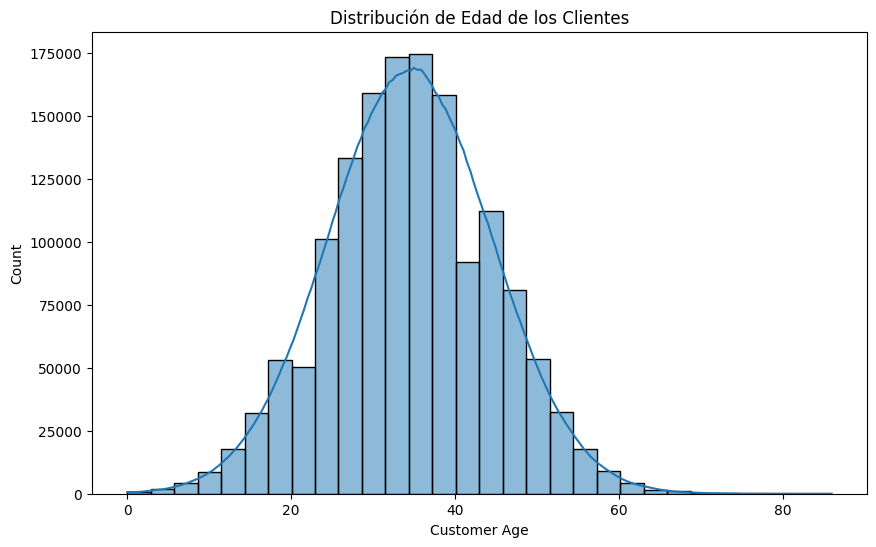

In [19]:
# Segmentación de clientes (ejemplo simple)
plt.figure(figsize=(10, 6))
sns.histplot(ecommerce['Customer Age'], bins=30, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.show()

Aquí buscamos mostrar la distribución de edades de los clientes en el conjunto de datos de transacciones de comercio electrónico. 

La mayoría de los clientes se encuentran en el rango de edad de 20 a 50 años, con un pico alrededor de los 35 años. 

Respecto a la distribución es aproximadamente simétrica, lo que indica que hay un número similar de clientes más jóvenes y mayores en relación con la edad promedio.

### Determinamos el MVP

In [20]:
# Creo nuevas características relevantes para el modelo:
ecommerce['DayOfWeek'] = ecommerce['Transaction Day'].dt.dayofweek
ecommerce['Month'] = ecommerce['Transaction Day'].dt.month

# Lista de columnas categóricas relevantes para codificar
categorical_columns = ['Payment Method', 'Product Category', 'Device Used']

# Codificar variables categóricas
le = LabelEncoder()
for col in categorical_columns:
    ecommerce[col] = le.fit_transform(ecommerce[col])

# Seleccionar características relevantes
features = ['Transaction Amount', 'DayOfWeek', 'Month'] + categorical_columns

# Normalizar datos (Opcional pero recomendado para modelos basados en distancias)
scaler = StandardScaler()
X = scaler.fit_transform(ecommerce[features])

# Separar en X e y
y = ecommerce['Is Fraudulent']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Simular datos para 2025 (ajusta las distribuciones según tus expectativas)
nuevos_datos_2025 = pd.DataFrame({
    'Transaction Amount': np.random.normal(loc=150, scale=50, size=1000), 
    'DayOfWeek': np.random.randint(0, 7, size=1000),
    'Month': np.random.randint(1, 13, size=1000),
    'Payment Method': np.random.choice(le.classes_, size=1000),  # Simular valores para Payment Method
    'Product Category': np.random.choice(le.classes_, size=1000),  # Simular valores para Product Category
    'Device Used': np.random.choice(le.classes_, size=1000)        # Simular valores para Device Used
})

# Codificar variables categóricas en los nuevos datos
for col in categorical_columns:
    nuevos_datos_2025[col] = le.transform(nuevos_datos_2025[col])

# Normalizar nuevos datos
nuevos_datos_2025 = scaler.transform(nuevos_datos_2025[features])

# Predecir si son fraudulentas
predicciones_2025 = model.predict(nuevos_datos_2025)

# Contar la cantidad de predicciones de fraude
cantidad_fraudes_2025 = sum(predicciones_2025)
print("Proyección de cantidad de fraudes en 2025:", cantidad_fraudes_2025)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96    419700
           1       0.17      0.15      0.16     22109

    accuracy                           0.92    441809
   macro avg       0.56      0.56      0.56    441809
weighted avg       0.92      0.92      0.92    441809

[[403892  15808]
 [ 18801   3308]]
Proyección de cantidad de fraudes en 2025: 21


Vamos a explicar el contexto antes de exponer esta predicción.

Tengamos en cuenta que el df trata un breve periodo de tiempo, por ende el análisis revela que nuestro modelo de detección de fraudes es bastante preciso al identificar transacciones legítimas, pero aún tiene margen de mejora en la detección de transacciones fraudulentas. 

Además, al simular datos para el próximo año, el modelo predice una baja cantidad de fraudes, lo cual es una buena noticia, aunque debemos tomar esta proyección con cautela ya que se basa en datos simulados y no en información real del futuro.

20:29:36 - cmdstanpy - INFO - Chain [1] start processing
20:29:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Esteban García\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Esteban García\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


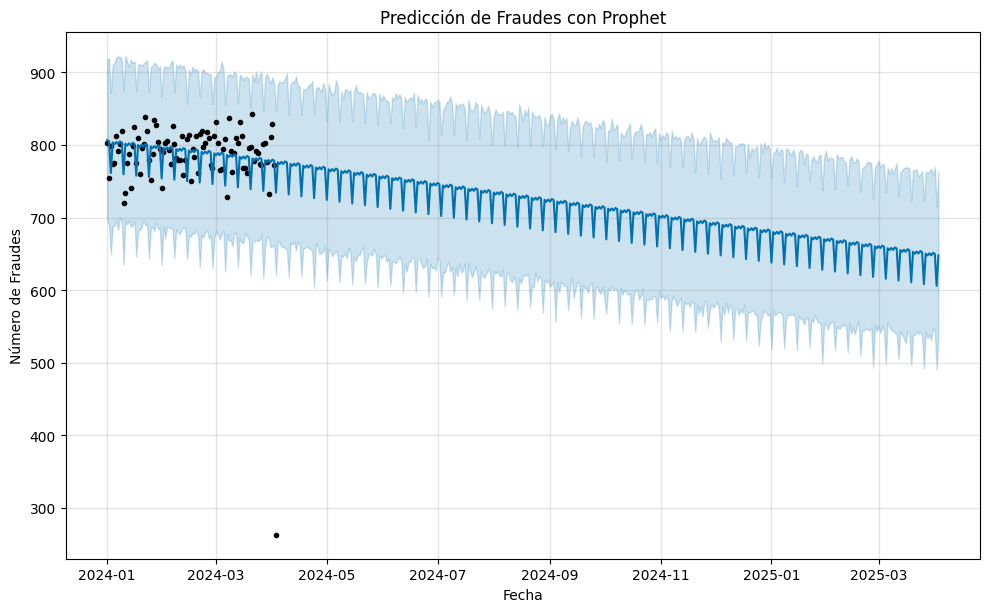

| ds                  | yhat    | yhat_lower   | yhat_upper   |
|:--------------------|:--------|:-------------|:-------------|
| 2025-01-01 00:00:00 | 637.99  | 518.643      | 754.796      |
| 2025-01-02 00:00:00 | 680.112 | 573.101      | 788.921      |
| 2025-01-03 00:00:00 | 677.439 | 565.427      | 789.958      |
| 2025-01-04 00:00:00 | 680.46  | 568.149      | 796.643      |
| 2025-01-05 00:00:00 | 677.635 | 569.613      | 785.863      |
| 2025-01-06 00:00:00 | 681.204 | 570.09       | 793.274      |
| 2025-01-07 00:00:00 | 679.576 | 564.521      | 793.897      |
| 2025-01-08 00:00:00 | 635.521 | 519.891      | 749.157      |
| 2025-01-09 00:00:00 | 677.643 | 560.099      | 794.877      |
| 2025-01-10 00:00:00 | 674.97  | 565.704      | 794.516      |
| 2025-01-11 00:00:00 | 677.991 | 566.615      | 788.992      |
| 2025-01-12 00:00:00 | 675.166 | 565.643      | 785.523      |
| 2025-01-13 00:00:00 | 678.735 | 567.102      | 793.968      |
| 2025-01-14 00:00:00 | 677.107 | 563.13

c:\Users\Esteban García\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


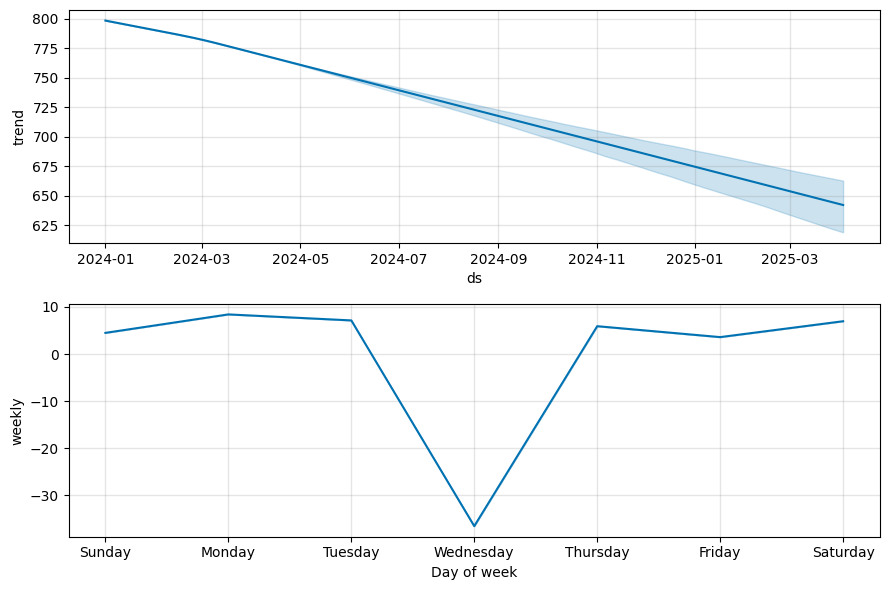

In [21]:
"""
ahora realizaremos una proyección de Fraudes con Prophet
"""
# Preparo los datos para Prophet
df_prophet = ecommerce.groupby('Transaction Day')['Is Fraudulent'].sum().reset_index()
df_prophet = df_prophet.rename(columns={'Transaction Day': 'ds', 'Is Fraudulent': 'y'})

# Entreno el modelo Prophet (ajustando parámetros si es necesario)
m = Prophet(interval_width=0.95, growth='linear')  # Puedes ajustar parámetros aquí
m.fit(df_prophet)

# Creo un dataframe para futuras predicciones
future = m.make_future_dataframe(periods=365, freq='D')  # 'D' para días
forecast = m.predict(future)

# Visualizo las predicciones
fig1 = m.plot(forecast)
plt.title("Predicción de Fraudes con Prophet")
plt.xlabel("Fecha")
plt.ylabel("Número de Fraudes")
plt.show()

# Proyección de fraudes para 2025 (ajustando el filtro)
forecast_2025 = forecast[forecast['ds'].dt.year == 2025]
print(forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_markdown(index=False, numalign="left", stralign="left"))

# Visualizar componentes de la serie temporal
fig2 = m.plot_components(forecast)
plt.show()


Aquí pretendemos con el modelo Prophet explciar la proyección de una disminución gradual en los casos de fraude a lo largo del año 2025, lo cual es una noticia alentadora. 

Sin embargo, es importante tener en cuenta que estas son estimaciones con un margen de incertidumbre considerable, especialmente hacia finales de año.

La tabla detallada revela predicciones diarias de fraudes, mostrando una tendencia a la baja en general, pero con fluctuaciones que sugieren posibles patrones estacionales. 

A pesar de la incertidumbre inherente a las predicciones a largo plazo, esta información puede ser valiosa para planificar estrategias de prevención y detección de fraudes a lo largo del año, enfocándose en los períodos de mayor riesgo.